<a href="https://colab.research.google.com/github/a-forty-two/DataSetsForML/blob/master/12_Torch_layers_and_BagOfWords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

y = mx + c, Machine Learning

TF---builds ---> Directed Acyclic Graph-> collection of neurons 

output = weights * input + bias 


Pytorch----builds---> Affine Map -> collection of neurons 

output = Affinity * input + bias 

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(42)

In [3]:
layer = nn.Linear(1,1) # maps 1 input to 1 output, single layer of neuron = ML 
data = torch.randn(5,1)
print(data)
print(layer(data)) 

tensor([[ 1.1103],
        [-1.6898],
        [-0.9890],
        [ 0.9580],
        [ 1.3221]])
tensor([[0.2124],
        [1.3497],
        [1.0650],
        [0.2743],
        [0.1264]], grad_fn=<AddmmBackward>)


In [6]:
data = torch.randn(4,4)
print(data)
print(F.relu(data))

tensor([[ 0.3466, -0.1973, -1.0546,  1.2780],
        [ 0.1453,  0.2311,  0.0087, -0.1423],
        [ 0.5750, -0.6417, -2.2064, -0.7508],
        [ 2.8140,  0.3598, -0.0898,  0.4584]])
tensor([[0.3466, 0.0000, 0.0000, 1.2780],
        [0.1453, 0.2311, 0.0087, 0.0000],
        [0.5750, 0.0000, 0.0000, 0.0000],
        [2.8140, 0.3598, 0.0000, 0.4584]])


In [8]:
# SOFTMAX  exp(x_i)/sum(exp(x_j))
data = torch.randn(5)
print(data)
print(F.softmax(data, dim=0))
print(F.log_softmax(data, dim=0))


tensor([-0.3417,  0.3040, -0.6890, -1.1267, -0.2858])
tensor([0.1950, 0.3720, 0.1378, 0.0890, 0.2062])
tensor([-1.6346, -0.9889, -1.9819, -2.4197, -1.5787])


In [0]:
# Use BagOfWord for text classification in PyTorch
# Bag of Words
# SET of Words -> no REPEATING!!! only unique elements
# Hello world, and hello sparrow! -> { hello:2, world:1, and:1, sparrow:1} BAG of Words 
# We'll log regression on encoded bag of words for classification

# y = log_Softmax(Ax+b) -> A is affinity, x is data, b is bias 

trainx = [("Como estais amigo? No habla espanol".split(), "SPANISH"),
          ("Buffalo is black. Night is black.".split(),"ENGLISH"),
          ("No creo que sea una buena idea".split(),"SPANISH"),
          ("Buffalo is green. Night is green.".split(),"ENGLISH")]
testx = [("Yo creo que si, que pasa?".split(),"SPANISH"),
         ("Night is buffalo. Green is black.".split(),"ENGLISH")]


In [27]:
# A set of all the words
wordidx = {}
for sent, _ in trainx+testx:
  for word in sent:
    if word not in wordidx:
      wordidx[word] = len(wordidx)
wordidx

{'Buffalo': 6,
 'Como': 0,
 'Green': 21,
 'Night': 9,
 'No': 3,
 'Yo': 17,
 'amigo?': 2,
 'black.': 8,
 'buena': 14,
 'buffalo.': 20,
 'creo': 10,
 'espanol': 5,
 'estais': 1,
 'green.': 16,
 'habla': 4,
 'idea': 15,
 'is': 7,
 'pasa?': 19,
 'que': 11,
 'sea': 12,
 'si,': 18,
 'una': 13}

In [0]:
VOCAB_SIZE = len(wordidx)
NUM_LABELS = 2
# Object Oriented (CLASS is the MODEL definition)
class BoWClassifier(nn.Module):  # Class is inheriting for nn.Module and becoming a NN
  def __init__(this, num_labels, vocab_size):
    super(BoWClassifier, this).__init__() # this invokes init of the parent 
    # dense(tf) are Linear (pt)
    this.linear = nn.Linear(vocab_size, num_labels)
  def forward(this, bow_vec):
    val = F.softmax(this.linear(bow_vec), dim=1)
    return val
# Inheritence -> Parents give their public, protected, private everything to children who inherit them 
# so whatever functions, lambdas,etc that model.nn has will now be available for BoWClassifier as well



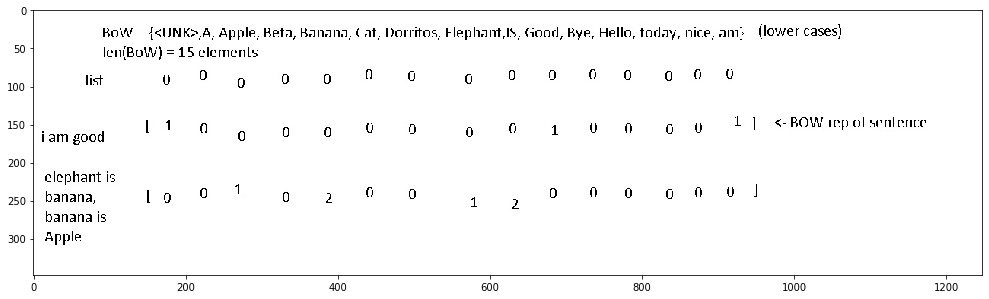

In [16]:
#Bag of words
import cv2
import matplotlib.pyplot as plt
x = cv2.imread('bow.jpg')
plt.figure(figsize=(17,12))
plt.imshow(x)


In [53]:
def createVector(sentence, wordidx):
  vec = torch.zeros(len(wordidx))
  for word in sentence:
    vec[wordidx[word]] += 1
  return vec.view(1,-1) # -1 infer rest of the dimensions automatically 
  # .view reshapes the data into desired dimensions

def createLabel(label, labelidx):
  return torch.LongTensor([labelidx[label]]) # Float, Int, Long, Float16,Int16...

model = BoWClassifier(NUM_LABELS, VOCAB_SIZE)
for param in model.parameters():
  print(param)

Parameter containing:
tensor([[ 0.0610, -0.0466,  0.0830, -0.1750,  0.1583, -0.1565, -0.0368,  0.0445,
          0.1101,  0.1721,  0.1942, -0.1691,  0.0537, -0.0917, -0.0234, -0.1596,
          0.1942, -0.1565,  0.1139,  0.0749,  0.0693, -0.1153],
        [ 0.1938,  0.0469,  0.0274, -0.1879,  0.0895, -0.0320, -0.0977,  0.1831,
          0.0475, -0.1180, -0.1079, -0.0102,  0.1190, -0.0545, -0.1216, -0.0730,
         -0.1593,  0.0760,  0.1650, -0.2007,  0.0495,  0.1101]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0387, -0.0759], requires_grad=True)


Parameter containing:
tensor([[ 0.1231,  0.0381,  0.1083, -0.1299, -0.2110, -0.0824, -0.1635,  0.1749,
          0.0614,  0.0883,  0.0674, -0.0037,  0.1669, -0.1515,  0.0134, -0.1455,
          0.0657, -0.0734,  0.0653, -0.0444,  0.1768, -0.1264],
        [-0.1272, -0.1272,  0.1918,  0.0710,  0.2052, -0.1759, -0.2115, -0.1668,
         -0.1434,  0.0864,  0.0763,  0.1772, -0.1101, -0.1453,  0.1131, -0.0862,
          0.1294, -0.0506,  0.1220, -0.1657, -0.1076,  0.0650]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0451, -0.0544], requires_grad=True)


In [54]:

# to run the model, we will take BoW vector and pass it to our creator
with torch.no_grad():
  sample = trainx[1]
  bowvector = createVector(sample[0], wordidx)
  print(bowvector)
  log_probs = model(bowvector)
  print(log_probs)

tensor([[0., 0., 0., 0., 0., 0., 1., 2., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]])
tensor([[0.5777, 0.4223]])


In [65]:
# Learning 
import numpy as np
HP_epoch = 100
labelidx = {"SPANISH":0, "ENGLISH":1}
loss_fn = nn.NLLLoss()
opt = optim.SGD(model.parameters(), lr=0.1)
for epoch in range(HP_epoch):
  for instance, label in trainx:
    model.zero_grad() # resets the accumulated graidents, IMP: not weights, the GRADIENTS are being set to 0
    bowvector = createVector(instance, wordidx)
    target = createLabel(label, labelidx)
    log_prob = model(bowvector)
    loss = loss_fn(log_probs, target)
    loss.requires_grad = True
    # after calculating loss, update the weights 
    loss.backward()
    opt.step()
oppTrans = {0:'Spanish', 1:'English'}
with torch.no_grad():
  for instance, label in testx:
    bowvector = createVector(instance, wordidx)
    log_prob = model(bowvector)
    print((oppTrans.get(np.argmax(log_prob).item())))


val_data = [('que pasa?'.split(),'SPANISH')]
with torch.no_grad():
  for instance, label in val_data:
    bowvector = createVector(instance, wordidx)
    log_prob = model(bowvector)
    print(instance)
    print((oppTrans.get(np.argmax(log_prob).item())))



Spanish
English
['que', 'pasa?']
Spanish
